# # https://youtu.be/GRtgLlwxpc4

# # 필요한 라이브러리

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
from IPython.display import Image

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-236-gdcf8073 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.7/78.2 GB disk)


# # 이후 순서
  * 인식할 이미지 수집
    - train_data(폴더)
      + images(폴더)
        * train(폴더)
          - 이미지들 -> makesense.ai 에서 레이블링
        * val(폴더)
          - 이미지들 -> makesense.ai 에서 레이블링
      + labels(폴더)
        * train(폴더)
          - 레이블링한 txt 파일들
        * val(폴더)
          - 레이블링한 txt 파일들
  * 코랩에 train_data 폴더 zip 파일 업로드

In [3]:
!unzip -q ../train_data.zip -d ../

# # 전처리
  * yolov5 - data - coco128.yaml 다운로드
    - 수정
  * custom_data.yaml 로 파일명 변경

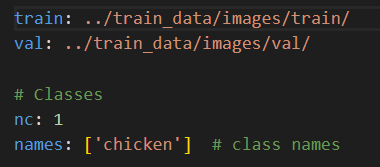

In [13]:
Image('/content/drive/MyDrive/Colab Notebooks/Learning/딥러닝/객체인식/res/train_data yaml 예시.png')

# # 훈련
  * coco128.yaml -> custom_data.yaml

In [8]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 60 --data custom_data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=60, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-236-gdcf8073 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degr

# # 결과 확인
  * 검증을 위해 다운로드 했던 val 폴더에 있던 이미지를 잘 인식했는지 확인할 수 있다.
    - 훈련 결과 맨 마지막에 
      + Results saved to **runs/train/exp4**

# # 모델이 잘 돌아가는 확인

## ## weights(가중치) 경로 새로 설정
  * 훈련 결과 마지막 즘에 
    - Validating **runs/train/exp4/weights/best.pt**
  * --conf 0.35
    - 정확도 0.25 -> 0.35

### ### 이미지
  * 인식 시킬 이미지를 코랩에 업로드

In [14]:
!python detect.py --weights runs/train/exp4/weights/best.pt --img 640 --conf 0.35 --source ../test.jpg

detect: weights=['runs/train/exp4/weights/best.pt'], source=../test.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-236-gdcf8073 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/test.jpg: 448x640 1 chicken, Done. (0.020s)
Speed: 0.5ms pre-process, 19.7ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


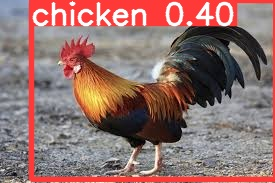

In [15]:
Image('/content/yolov5/runs/detect/exp3/test.jpg')

### ### 영상
  * 인식 시킬 영상 코랩에 업로드 후
  * 아래 코드 실행

In [ ]:
!python detect.py --weights runs/train/exp4/weights/best.pt --img 640 --conf 0.35 --source ../test.mp4